#  <p style="text-align: center;">Практическое задание к Семинару 9.<br><br>Урок 9. Линейная регрессия Логистическая регрессия.</p>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Модель **с интесептом**:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle y=a+b\cdot x$ (1)</b></font></div>

Модель **БЕЗ интесепта**:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle y=b\cdot x$ (2)</b></font></div>

Формула коффициента **b** с интерсептом:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle b=\frac{\bar{xy}-\bar x\cdot\bar y}{\bar{x^2}-{\bar x}^2}$ (3)</b></font></div>

**Коэффициент детерминации**:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle R^2=r^2$ (4)</b></font></div>

Формула коффициента **b** БЕЗ интерсепта:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle \hat b=\frac{\sum_{i=1}^n y_i x_i}{\sum_{i=1}^n \cdot x_i^2}$ (5)</b></font></div>

**Матричный метод (с интерсептом)**:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle\begin{pmatrix}y_1\\y_2\\y_3\\\dots\\y_n\end{pmatrix}=\begin{pmatrix}1\qquad x_1\\1\qquad x_2\\1\qquad x_3\\\dots\qquad \dots\\1\qquad x_n\end{pmatrix}\cdot\begin{pmatrix}a\\b\end{pmatrix}$ (6)</b></font></div>

**Коэффициент b (матричный метод)**:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\hat B=\left(X^{T}\cdot X\right)^{-1}\cdot X^{T}\cdot Y$  (7)</b></font></div> 

**Матричный метод (без интерсепта)**:<br>
<div class="alert alert-block alert-warning"><font size=4 color=black><b>$\displaystyle\begin{pmatrix}y_1\\y_2\\y_3\\\dots\\y_n\end{pmatrix}=\begin{pmatrix}x_1\\x_2\\x_3\\\dots\\x_n\end{pmatrix}\cdot\begin{pmatrix}b\end{pmatrix}$  (8)</b></font></div>


In [2]:
def mse_(b, y, x, n):
    return np.sum((b*x-y)**2)/n

In [3]:
def mse_ab(a,b, x, y): # Функция потерь
    return np.sum(((a+b*x)-y)**2)/len(x)

In [4]:
def mse_pa(a,b,x,y):  # Частная производная функции потерь по a
    return 2*np.sum((a+b*x)-y)/len(x)

In [5]:
def mse_pb(a,b,x,y): # Частная производная функции потерь по b
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

## ЗАДАНИЕ 1. 
***Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):***
```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
***Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.***

**<p style="text-align: center;">
    <font size=10 color=#32CD32><b>-------------------------------</b></font><br>
    <font size=4.5 color=#3ac444>РЕШЕНИЕ:</font><br>
<font size=10 color=#32CD32><b>-------------------------------</b></font></p>**

In [6]:
# Дано:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1) Проведем исследование на наличие зависимости, с помощью графика.

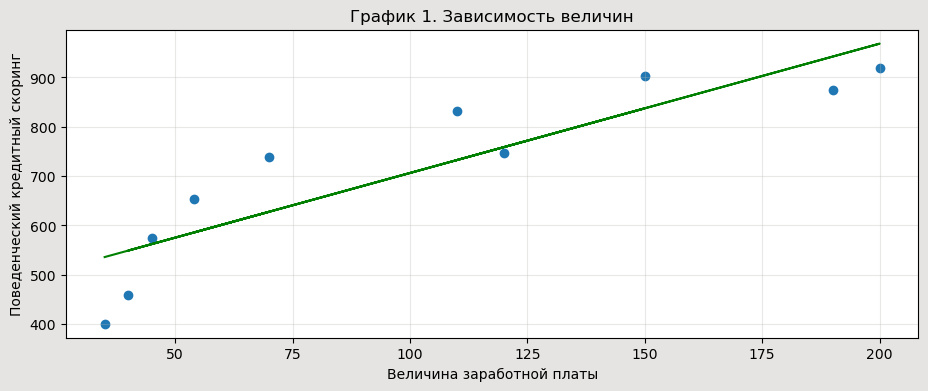

In [7]:
plt.figure(figsize=(11, 4)).set_facecolor('#E5E4E2')
plt.scatter(x,y)
plt.title('График 1. Зависимость величин')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.grid(color='#B5B8B1', alpha=0.30)
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x), c='g')
plt.show()

**Вывод:** По графику 1, модно предположить наличие линейной зависимости.

## 1) Математические формулы

### С интерсептом

In [8]:
# Из условия задачи, предположим, что связь между величинами можем описать по Модели (1), тогда коэффициент b найдем по 
# формуле (3)
b = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)

# Найдем интерсепт a.
a = np.mean(y) - b*np.mean(x)
print(f' a = {round(a,2)}, b = {round(b,2)}') #y = 444.18 + 2.62*x

 a = 444.18, b = 2.62


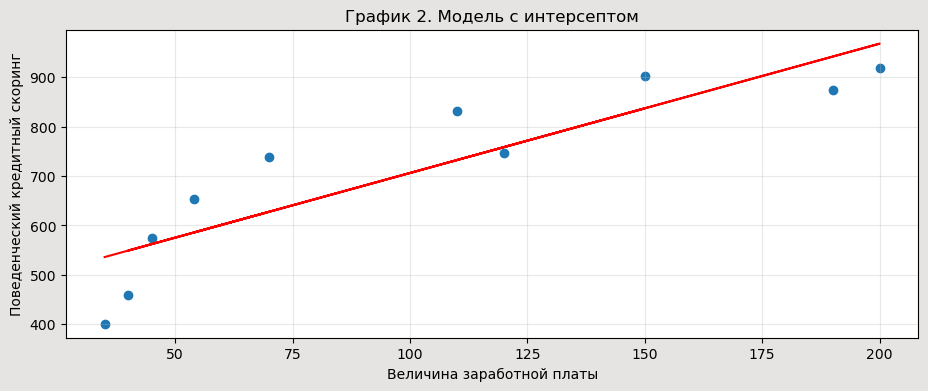

In [9]:
# Графически отобразим полученные результаты
plt.figure(figsize=(11, 4)).set_facecolor('#E5E4E2')
plt.scatter(x,y)
plt.title('График 2. Модель с интерсептом')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.grid(color='#B5B8B1', alpha=0.30)
plt.plot(x, 444.18+2.62*x, c='r')
plt.show()

In [10]:
# Проверим с помощью библиотеки sklearn
model_intersept = LinearRegression().fit(x.reshape(-1, 1), y)
a = model_intersept.intercept_
b = model_intersept.coef_[0]
print(f"a = {round(a,2)}\nb = {round(b,2)}")

a = 444.18
b = 2.62


Таким образом линейную взаимосвязь между заработной платой и кредитным скорингом можно описать функцией:<br>
<b>$ks=444.18+2.62\cdot zp$</b>

### Без интерсепта

In [11]:
# Из условия задачи, предположим, что связь между величинами можем описать по Модели (2), тогда коэффициент b найдем по 
# формуле (3)
b = np.sum(x*y) / sum(np.square(x))
print(f'b = {round(b,2)}') #y = 5.89*x

b = 5.89


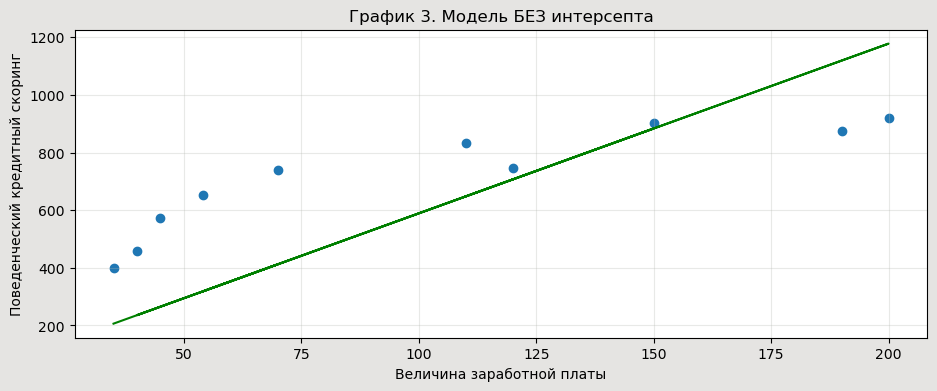

In [12]:
# Графически отобразим полученные результаты
plt.figure(figsize=(11, 4)).set_facecolor('#E5E4E2')
plt.scatter(x,y)
plt.title('График 3. Модель БЕЗ интерсепта')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.grid(color='#B5B8B1', alpha=0.30)
plt.plot(x, 5.89*x, c='g')
plt.show()

In [13]:
# Проверим с помощью библиотеки sklearn
model_NONE_intersept = LinearRegression(fit_intercept=False)
rezult = model_NONE_intersept.fit(x.reshape(-1, 1), y)
a = rezult.intercept_
b = rezult.coef_[0]
print(f"a = {round(a,2)}\nb = {round(b,2)}")

a = 0.0
b = 5.89


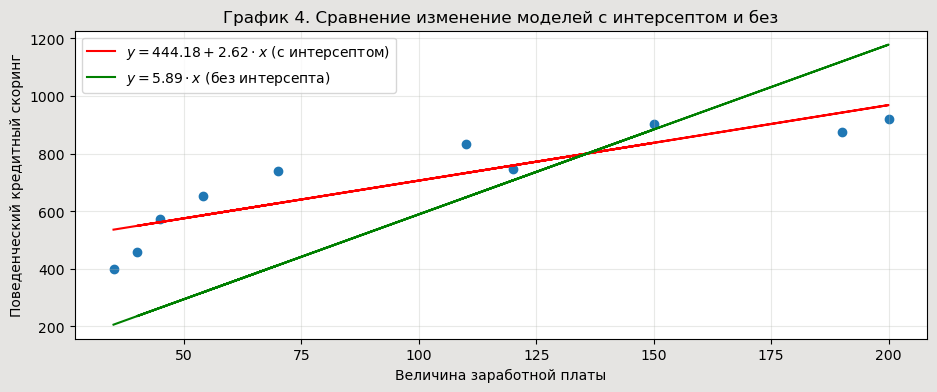

In [14]:
# Сравним графики двух моделей
plt.figure(figsize=(11, 4)).set_facecolor('#E5E4E2')
plt.scatter(x,y)
plt.title('График 4. Сравнение изменение моделей с интерсептом и без')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.grid(color='#B5B8B1', alpha=0.30)
plt.plot(x, 444.18+2.62*x, c='r', label=r'$y=444.18+2.62\cdot x $ (с интерсептом)')
plt.plot(x, b*x, c='g', label=r'$y=5.89\cdot x $ (без интерсепта)')
plt.legend()
plt.show()

## 2) Матричный метод

### С интерсептом

In [15]:
# По формуле (7) проведем рассчет
x_matrix = x.reshape((-1, 1))
y_matrix = y.reshape((-1, 1))
x_2 = np.hstack([np.ones((len(x_matrix),1)), x_matrix])
b_matrix = np.dot(np.linalg.inv(np.dot(x_2.T, x_2)), x_2.T @ y_matrix)
print(f' a = {round(float (b_matrix[0]),2)}, b = {round(float (b_matrix[1]),2)}') #y = 444.18 + 2.62*x

 a = 444.18, b = 2.62


### Без интерсепта

In [16]:
# По формуле (7) проведем рассчет, без добавления столбца "1"
b_matrix = np.dot(np.linalg.inv(np.dot(x_matrix.T, x_matrix)), x_matrix.T @ y_matrix)
print(f' b = {round(float (b_matrix[0]),2)}') #y = 5.89*x

 b = 5.89


### Произведем оценку полученной модели с интерсептом

Вычислим по формуле (4) какую долю изменчивости ***y*** описала подобранная математическая модель

In [17]:
R = np.corrcoef(x,y)[0,1]**2
print(f' R = {round(R,5)*100}') # 78.764 - полученная модель описывает фактические данные

 R = 78.764


In [18]:
# Проверим с помощью библиотеки sklearn
R_check = LinearRegression().fit(x.reshape(-1, 1), y)
print (f'R = {round(R_check.score(x.reshape(-1, 1), y) * 100, 3)}')

R = 78.764


**Вывод:** т.к. R = 78.764 %, это означает, что 78.764 % изменчивости описано с помощью подобранной математической модели. R > 60 %,  что является очень хорошим показателем (наша модель описывает фактические значения).

### Произведем оценку полученной модели с интерсептом

In [19]:
# Проверим с помощью библиотеки sklearn
R_check = LinearRegression(fit_intercept=False).fit(x.reshape(-1, 1), y)
print (f'R = {round(R_check.score(x.reshape(-1, 1), y) * 100, 3)}')

R = -85.49


<div class="alert alert-block alert-success"><font size=3 color='b'><b>ОТВЕТ: </b><br>Коэффициенты линейной регрессии равны:<br>Модель с интерсептом: $y = 444.18+2.62\cdot x  =>  ks=444.18+2.62\cdot zp$<br>Модель БЕЗ интерсепта: $y = 5.89\cdot x  =>  ks=5.89\cdot zp$<br>Было установлено, что модель с интерсептом имеет значения наиболее близкие к фактическим.</font></div>

---

## ЗАДАНИЕ 2. 
***Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).***

**<p style="text-align: center;">
    <font size=10 color=#32CD32><b>-------------------------------</b></font><br>
    <font size=4.5 color=#3ac444>РЕШЕНИЕ:</font><br>
<font size=10 color=#32CD32><b>-------------------------------</b></font></p>**

In [20]:
# Дано
# zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
# ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
# По формуле (2)
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
B1 = 0.1
mse_min= mse_ (B1, y, x, len(x))
i_min=1
b_min=B1
for i in range(5000):
    B1-=alpha*(2/len(x)) * np.sum((B1*x - y) * x)
    if i%100==0:
        print(f'Итерация #{i}, b={B1}, mse={mse_(B1, y, x, len(x))}')
    if mse_ (B1, y, x, len(x)) > mse_min:
        print(f'Итерация #{i_min}, b={b_min}, mse={mse_min},\nДостигнуто минимальное значение.')
        break
    else:
        mse_min= mse_(B1, y, x, len(x))
        i_min=i
        b_min=b

Итерация #0, b=0.25952808, mse=493237.7212546963
Итерация #100, b=5.54537842245223, mse=58151.31823171113
Итерация #200, b=5.868748638669329, mse=56522.97550129376
Итерация #300, b=5.888531320728348, mse=56516.88130936019
Итерация #400, b=5.8897415574471985, mse=56516.85850140053
Итерация #500, b=5.889815595583751, mse=56516.858416040064
Итерация #600, b=5.889820124983314, mse=56516.85841572062
Итерация #628, b=5.889820420132688, mse=56516.85841571966,
Достигнуто минимальное значение.


In [21]:
print (f'b = {round(b_min,2)}')

b = 5.89


<div class="alert alert-block alert-success"><font size=3 color='b'><b>ОТВЕТ: </b><br>Используя метод градиентного спуска, был найден коэффициент линейной регрессии, для модели без интерсепта, который равен:<br>b = 5.89<br>Данный результат соотвествет найденым значениям в предыдущей задачи.</font></div>

---

## ЗАДАНИЕ 3. 
***Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).***

**<p style="text-align: center;">
    <font size=10 color=#32CD32><b>-------------------------------</b></font><br>
    <font size=4.5 color=#3ac444>РЕШЕНИЕ:</font><br>
<font size=10 color=#32CD32><b>-------------------------------</b></font></p>**

In [22]:
# Дано
# zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
# ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
# По формуле (1)
b=0.1
a=0.1
alpha=5e-05
mseab_min = mse_ab(a,b,x,y)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha* mse_pa(a,b,x,y)
    b-=alpha* mse_pb(a,b,x,y)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, x, y)}')
    if mse_ab(a, b, x, y) > mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнуто минимальное значение.')
        break
    else:
        mseab_min= mse_ab(a, b, x, y)
        i_min=i
        b_min=b
        a_min=a
print(f'a = {round(a_min,2)}\nb = {round(b_min,2)}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнуто минимальное з

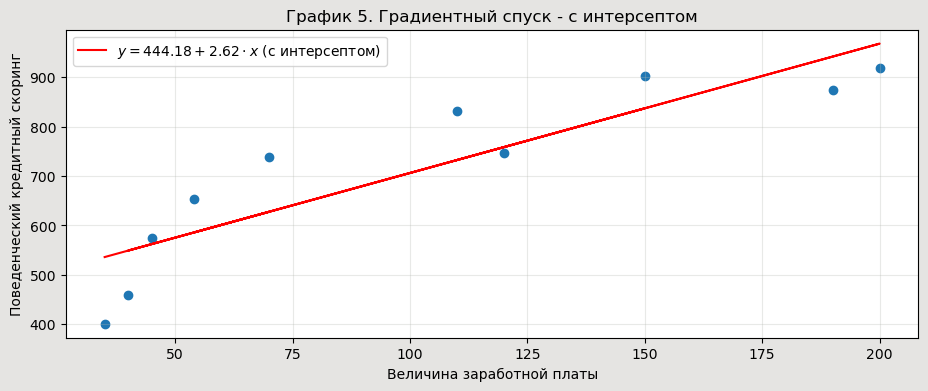

In [23]:
# График 5
plt.figure(figsize=(11, 4)).set_facecolor('#E5E4E2')
plt.scatter(x,y)
plt.title('График 5. Градиентный спуск - с интерсептом')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.grid(color='#B5B8B1', alpha=0.30)
plt.plot(x, 444.18+2.62*x, c='r', label=r'$y=444.18+2.62\cdot x $ (с интерсептом)')
plt.legend()
plt.show()

<div class="alert alert-block alert-success"><font size=3 color='b'><b>ОТВЕТ: </b><br>Используя метод градиентного спуска, были найдены коэффициенты линейной регрессии, для модели с интерсептом, уравнение имеет вид:<br>y= 444.18 + 2.62 * x  =>  ks = 444.18 + 2.62 * zp<br>Данный результат соотвествет найденым значениям в предыдущей задачи.</font></div>